In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import datetime
import matplotlib.pyplot as plt

# chargement données complémentaires

In [9]:
datafile_CIcomp = r'./Donnees_forage_Oume_Baka.xlsx'

In [10]:
DB_CIcomp = pd.read_excel(datafile_CIcomp)
DB_CIcomp.rename(columns={'Pf':'depth','EA (m)':'alt','X (m)':'X','Y (m)':'Y'},inplace=True)
DB_CIcomp['country'] = 'CI'

In [11]:
gDB = gpd.GeoDataFrame(
    DB_CIcomp, geometry=gpd.points_from_xy(DB_CIcomp.X, DB_CIcomp.Y),crs={'init': 'epsg:32630'})

gDB = gDB.to_crs(epsg=4326)
DB_CIcomp['lon'] = gDB.geometry.x
DB_CIcomp['lat'] = gDB.geometry.y

/home/hectorb/miniconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [12]:
datafile_CIcomp2 = r'./Base_de_donnees_Gagnoa.xlsx'

In [13]:
DB_CIcomp2 = pd.read_excel(datafile_CIcomp2)
DB_CIcomp2.rename(columns={'Longitude':'lon','Latitude':'lat','Prof_Totale':'depth','Epaisseur Altération':'alt','Niv_Statique':'NS'},inplace=True)
DB_CIcomp2['country'] = 'CI'
DB_CIcomp2['lon'] = -DB_CIcomp2.lon.apply(lambda x:np.nan  
                                   if (x =='') | (x=='nan') 
                                   else (int(x.split('°')[0])+ 
                                         float(x.split('°')[1].split('\'')[0])/60 +
                                         float(x.split('\'')[1].split('\"')[0])/3600))
DB_CIcomp2['lat'] = DB_CIcomp2.lat.apply(lambda x:np.nan  
                                  if (x =='') | (x=='nan') 
                                  else (int(x.split('°')[0])+ 
                                        float(x.split('°')[1].split('\'')[0])/60 + 
                                        float(x.split('\'')[1].split('\"')[0])/3600))

In [15]:
import geopandas as gpd
admin = gpd.read_file('./countries.shp')
HR = gpd.read_file('./BRGM_map_from_oneGeology_hardrock_AO_admin_onegeom.shp')

([<matplotlib.collections.PathCollection object at 0x7f930238e130>], ['donnees complementaires'])
<Axes.ArtistList of 3 collections>


/tmp/ipykernel_327259/3583920204.py:40: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes


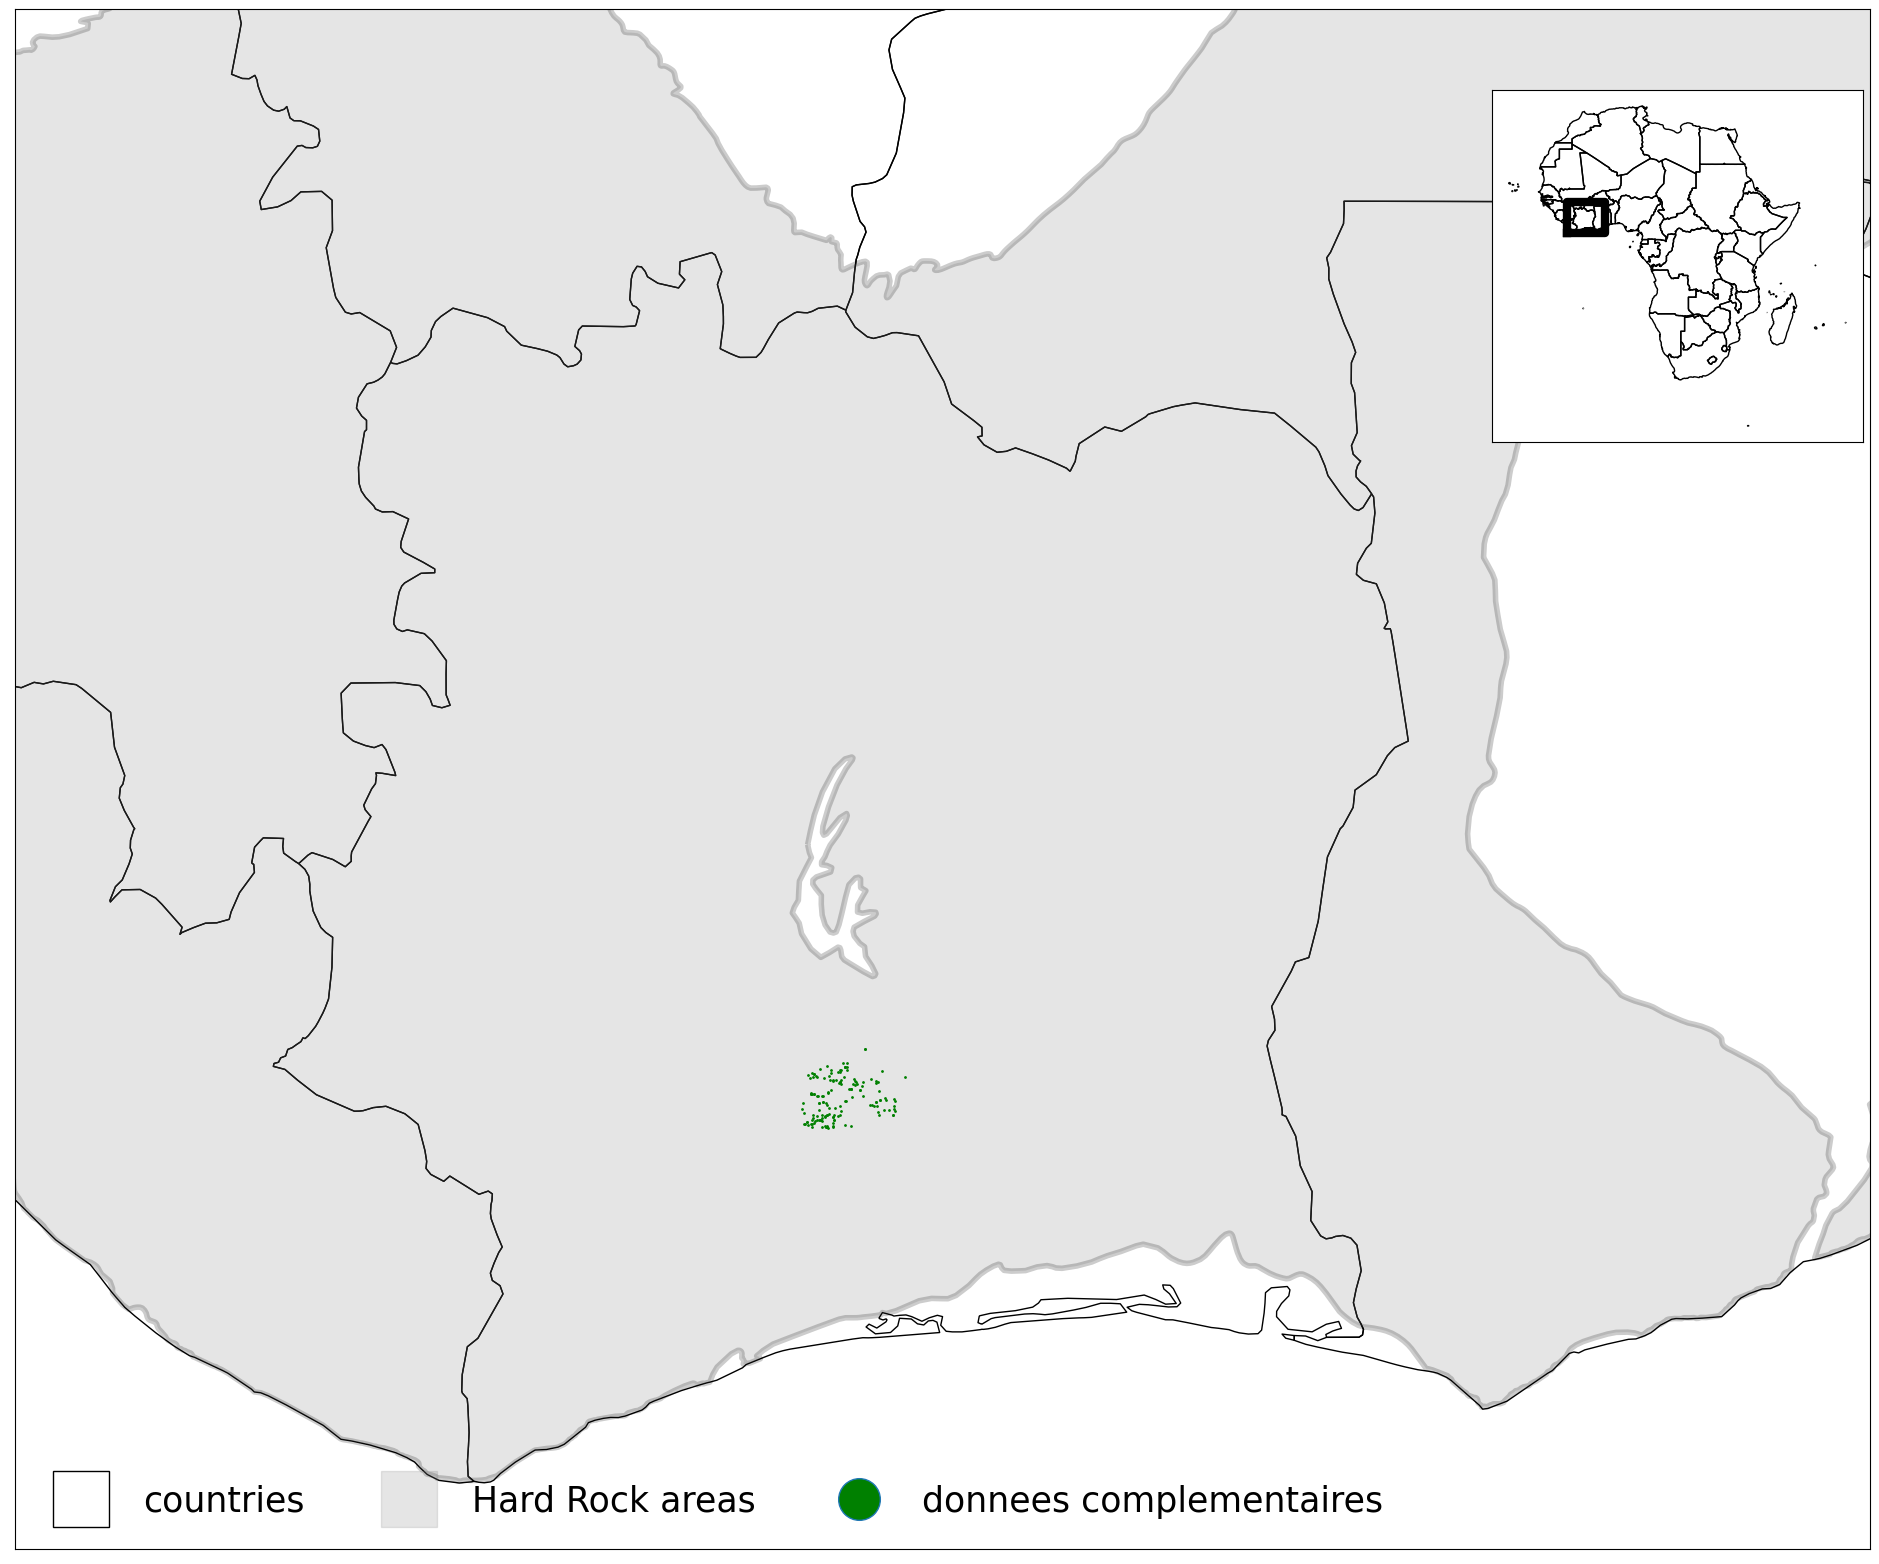

In [17]:
fig,ax = plt.subplots(1,1,figsize = (48,20))
latmin = 4
latmax = 12
lonmin = -10
lonmax = 0

ax.set_aspect(1) 

l1 = admin.plot(ax=ax,facecolor="none",edgecolor='k',linewidth=1, label = 'countries')
l2 = HR.plot(ax=ax,facecolor="grey",edgecolor='k',alpha=0.2,linewidth=4,label='Hard Rock areas')
#l3 = ax.scatter(x=DB.lon,y=DB.lat,c='r',s=1,label='boreholes')
l4 = ax.scatter(x=DB_CIcomp.lon,y=DB_CIcomp.lat,c='g',s=1,label='donnees complementaires')

print(l2.get_legend_handles_labels())
print(ax.collections)

ax.set_xlim([lonmin,lonmax]),ax.set_ylim([latmin,latmax])

ax.set_xticks([]),ax.set_yticks([]),ax.set_xlabel(''),ax.set_ylabel('')

# legend does not work on PathCollection objects. Workaround from
#https://stackoverflow.com/questions/72151994/how-can-i-add-legend-while-plotting-multiple-geopandas-dataframes-in-the-same-su
# https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
from matplotlib.lines import Line2D
lines = [
    Line2D([0], [0],linestyle='none',marker="s",markersize=40, markerfacecolor='w',markeredgecolor='k'),
    Line2D([0], [0],linestyle='none',marker="s",markersize=40, markerfacecolor='grey',markeredgecolor='grey',alpha=0.2),
    #Line2D([0], [0],linestyle='none',marker=".",markersize=60, markerfacecolor='r'),
    Line2D([0], [0],linestyle='none',marker=".",markersize=60, markerfacecolor='g'),    
]
labels = [t.get_label() for t in ax.collections[0:4]]
plt.legend(lines,labels,loc='lower left',prop={'size': 25},frameon=False,ncol=4)
#plt.legend(loc='lower left',prop={'size': 42})

#labels = [t.get_text() for t in ax.get_legend().get_texts()]
#print(labels)
#plt.savefig(fig_outs+'data_location.png')


from mpl_toolkits.axes_grid.inset_locator import inset_axes
inset_axes = inset_axes(ax,
                    width="20%", # width = 30% of parent_bbox
                    height=5., # height : 1 inch
                    loc='upper right')
l1 = admin.plot(ax=inset_axes,facecolor="none",edgecolor='k',linewidth=1, label = 'countries')
inset_axes.set_xticks([]),inset_axes.set_yticks([]),inset_axes.set_xlabel(''),inset_axes.set_ylabel('')
inset_axes.plot([lonmin,lonmax,lonmax,lonmin,lonmin],[latmin,latmin,latmax,latmax,latmin],'k',linewidth=6)


([<matplotlib.collections.PathCollection object at 0x7f93032daee0>], ['donnees complementaires Gagnoa'])
<Axes.ArtistList of 3 collections>


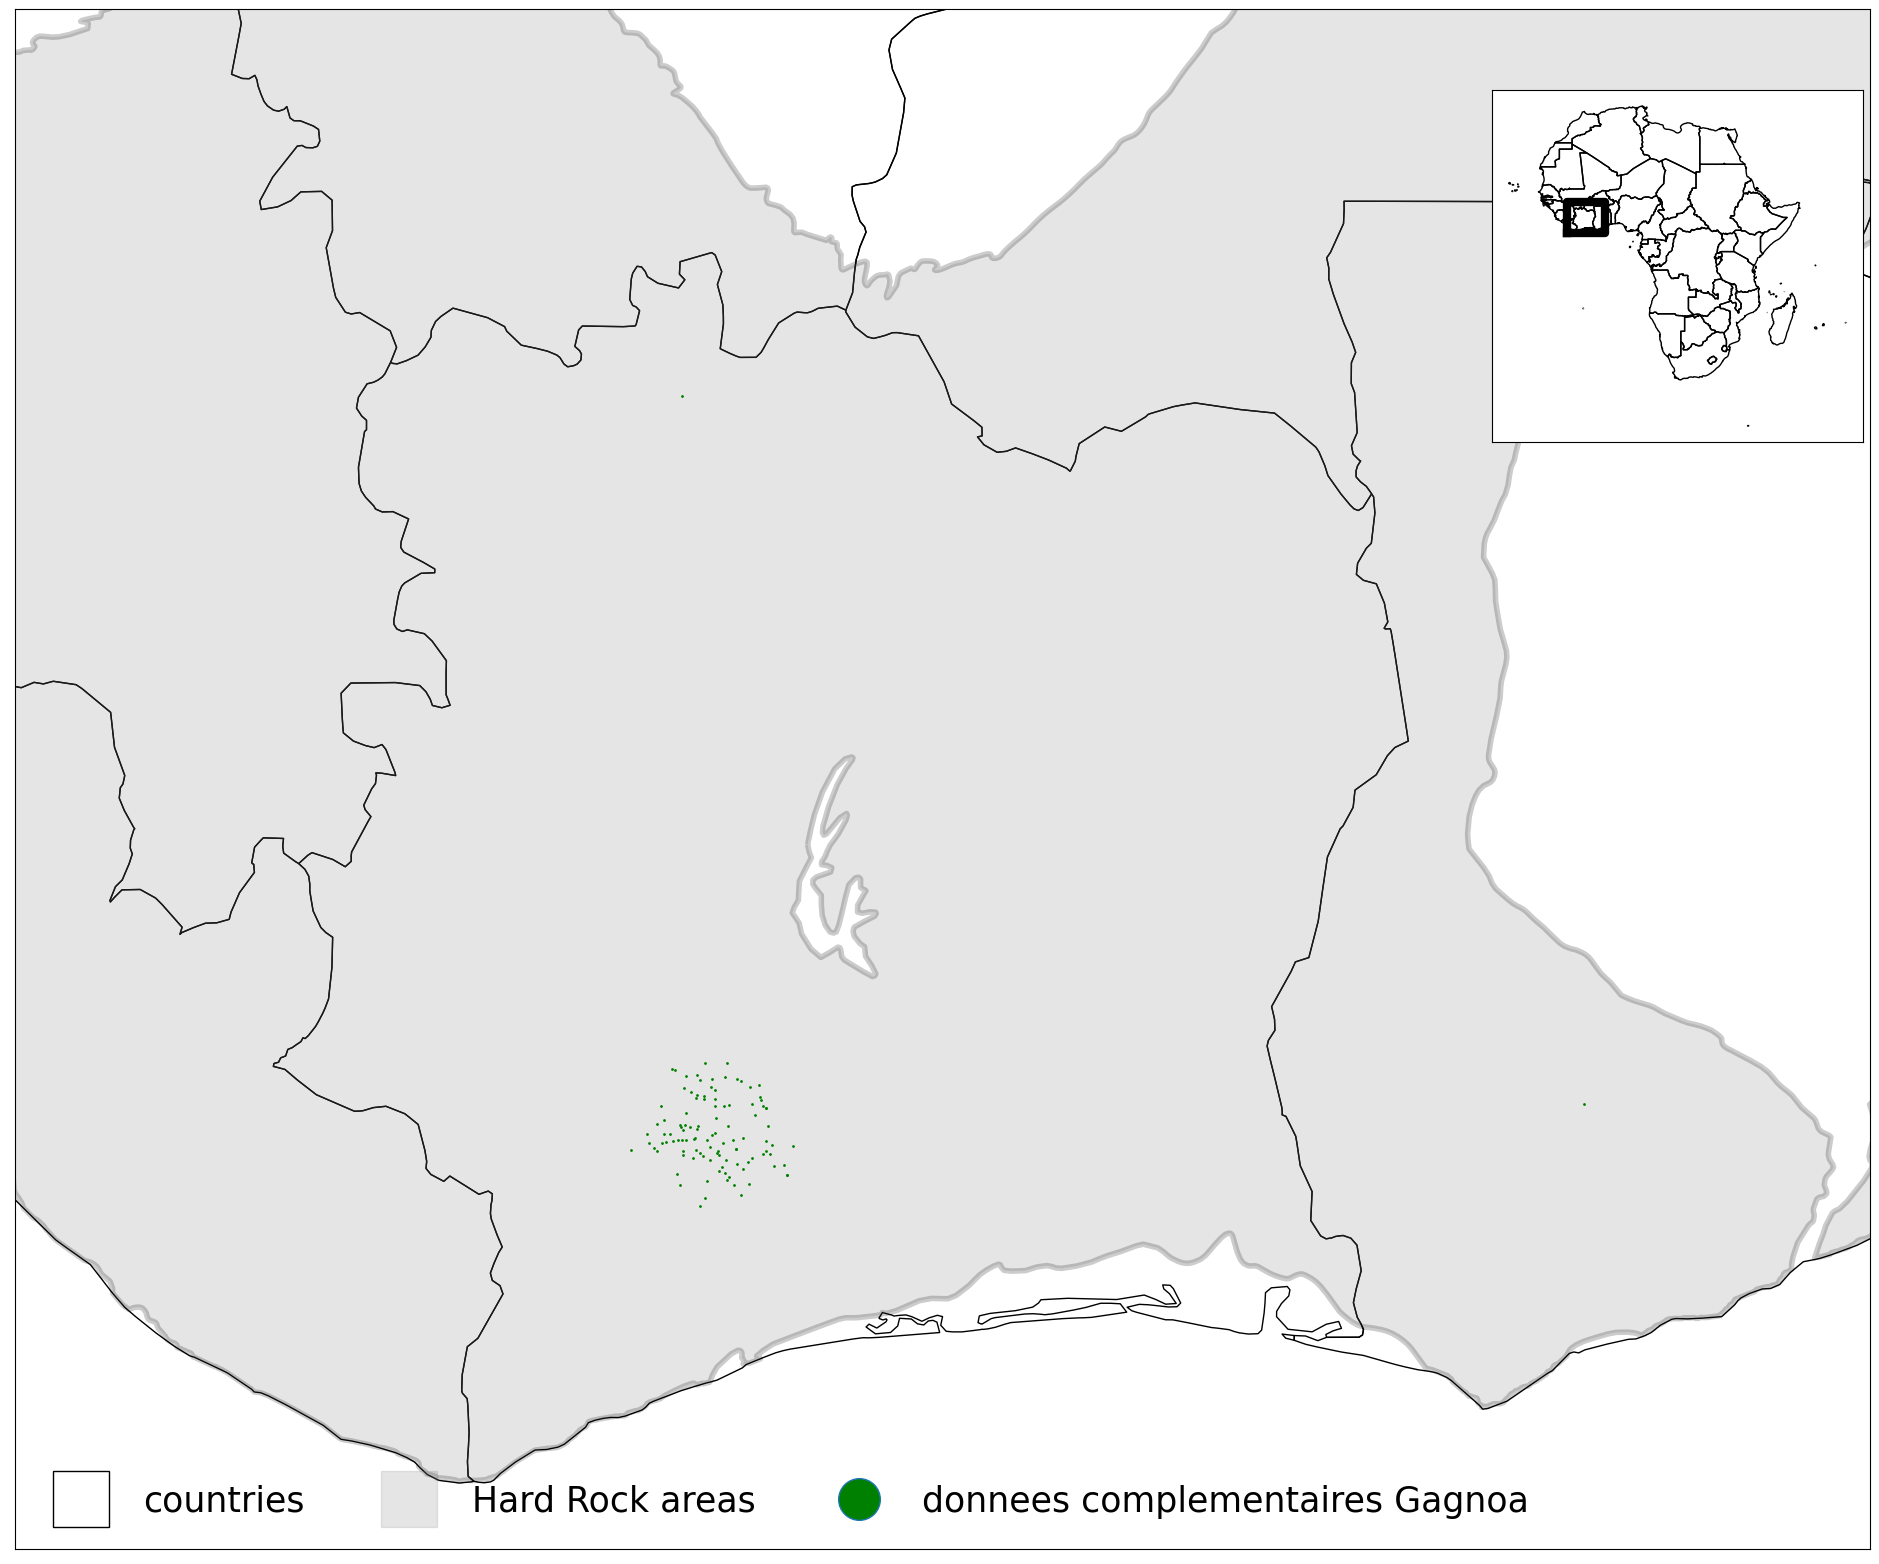

In [18]:
fig,ax = plt.subplots(1,1,figsize = (48,20))
latmin = 4
latmax = 12
lonmin = -10
lonmax = 0

ax.set_aspect(1) 

l1 = admin.plot(ax=ax,facecolor="none",edgecolor='k',linewidth=1, label = 'countries')
l2 = HR.plot(ax=ax,facecolor="grey",edgecolor='k',alpha=0.2,linewidth=4,label='Hard Rock areas')
#l3 = ax.scatter(x=DB.lon,y=DB.lat,c='r',s=1,label='boreholes')
l4 = ax.scatter(x=DB_CIcomp2.lon,y=DB_CIcomp2.lat,c='g',s=1,label='donnees complementaires Gagnoa')

print(l2.get_legend_handles_labels())
print(ax.collections)

ax.set_xlim([lonmin,lonmax]),ax.set_ylim([latmin,latmax])

ax.set_xticks([]),ax.set_yticks([]),ax.set_xlabel(''),ax.set_ylabel('')

# legend does not work on PathCollection objects. Workaround from
#https://stackoverflow.com/questions/72151994/how-can-i-add-legend-while-plotting-multiple-geopandas-dataframes-in-the-same-su
# https://stackoverflow.com/questions/39500265/how-to-manually-create-a-legend
from matplotlib.lines import Line2D
lines = [
    Line2D([0], [0],linestyle='none',marker="s",markersize=40, markerfacecolor='w',markeredgecolor='k'),
    Line2D([0], [0],linestyle='none',marker="s",markersize=40, markerfacecolor='grey',markeredgecolor='grey',alpha=0.2),
    #Line2D([0], [0],linestyle='none',marker=".",markersize=60, markerfacecolor='r'),
    Line2D([0], [0],linestyle='none',marker=".",markersize=60, markerfacecolor='g'),    
]
labels = [t.get_label() for t in ax.collections[0:4]]
plt.legend(lines,labels,loc='lower left',prop={'size': 25},frameon=False,ncol=4)
#plt.legend(loc='lower left',prop={'size': 42})

#labels = [t.get_text() for t in ax.get_legend().get_texts()]
#print(labels)
#plt.savefig(fig_outs+'data_location.png')


from mpl_toolkits.axes_grid.inset_locator import inset_axes
inset_axes = inset_axes(ax,
                    width="20%", # width = 30% of parent_bbox
                    height=5., # height : 1 inch
                    loc='upper right')
l1 = admin.plot(ax=inset_axes,facecolor="none",edgecolor='k',linewidth=1, label = 'countries')
inset_axes.set_xticks([]),inset_axes.set_yticks([]),inset_axes.set_xlabel(''),inset_axes.set_ylabel('')
inset_axes.plot([lonmin,lonmax,lonmax,lonmin,lonmin],[latmin,latmin,latmax,latmax,latmin],'k',linewidth=6)